(<Figure size 1008x720 with 2 Axes>,
 array([<AxesSubplot:xlabel='length', ylabel='time_mean'>,
        <AxesSubplot:xlabel='length', ylabel='# positive bits'>],
       dtype=object))

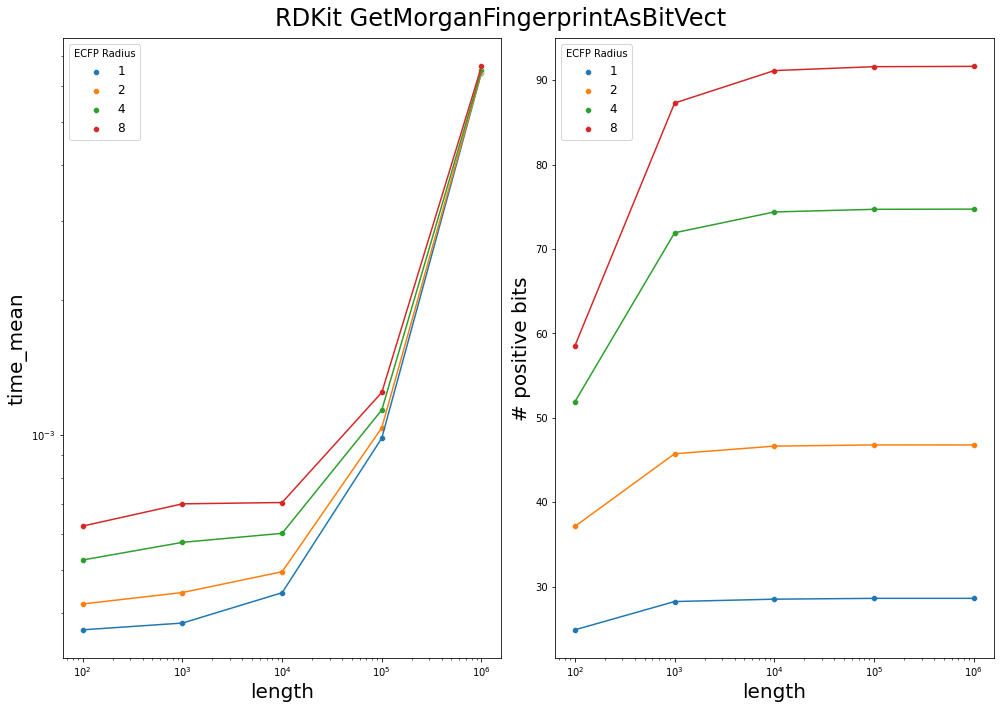

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
# rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.titlesize"] = 24
plt.rc('legend', fontsize=20)
import seaborn as sns




def make_plot():

    df = pd.read_csv("ecfp_encoding_results.csv", index_col=0)

    label_handles = []
    f, ax = plt.subplots(1,2, figsize=(14,10), sharex=True)
    for group, group_df in df.groupby(["radius"]):
        
        sns.scatterplot(x=group_df["length"], y=group_df["time_mean"], ax=ax[0], label=group)
        handle = ax[0].plot(group_df["length"], group_df["time_mean"])

        label_handles.append(ax[0])
        sns.scatterplot(x=group_df["length"], y=group_df["length"] * group_df["sparsity"], ax=ax[1], label=group)
        ax[1].plot(group_df["length"], group_df["length"] * group_df["sparsity"])
        ax[1].set_ylabel("# positive bits")
        # ax[1].set_yscale("log")
        ax[0].set_xscale("log")
        ax[0].set_yscale("log")
    
    f.suptitle("RDKit GetMorganFingerprintAsBitVect")
    plt.tight_layout()
    # ax[0].legend('r')
    # ax[1].legend(['r = 1', 'r = 2', 'r = 4', 'r = 8'])
    ax[0].legend(title="ECFP Radius", fontsize="large")
    ax[1].legend(title="ECFP Radius", fontsize="large")

    return f, ax

make_plot()
